# Approximation
Jakub Seredyński 54589

## Implement the equation
$$
\begin{cases}
p_0 * n + p_1 * \sum_{i} x_i = \sum_{i} y_i \\
p_0 \sum_{i} x_i + p_1 \sum_{i} x_i^2 = \sum_{i} x_i y_i \\
\end{cases}
$$

Extracting p0 to inject into second equation

$$
p_0 = \dfrac{\sum_{i} y_i - p_1 \sum_{i} x_i } {n}
$$

Solving for p1

$$

\begin{align}

\dfrac{\sum_{i} y_i - p_1 \sum_{i} x_i } {n} \sum_{i} x_i + p_1 \sum_{i} x_i^2 &= \sum_{i} x_i y_i \\

(\sum_{i} y_i - p_1 \sum_{i} x_i) \sum_{i} x_i + p_1 n \sum_{i} x_i^2 &= n \sum_{i} x_i y_i \\

\sum_{i} y_i \sum_{i} x_i - p_1 \sum_{i} x_i \sum_{i} x_i + p_1 n \sum_{i} x_i^2 &= n \sum_{i} x_i y_i \\

-p_1 \sum_{i} x_i \sum_{i} x_i + p_1 n \sum_{i} x_i^2 &= n \sum_{i} x_i y_i - \sum_{i} y_i \sum_{i} x_i \\

p_1 (-\sum_{i} x_i \sum_{i} x_i + n \sum_{i} x_i^2) &= n \sum_{i} x_i y_i - \sum_{i} y_i \sum_{i} x_i \\

p_1 &= \dfrac{n \sum_{i} x_i y_i - \sum_{i} y_i \sum_{i} x_i} {-\sum_{i} x_i \sum_{i} x_i + n \sum_{i} x_i^2} \\


\end{align}

$$

Solving for p0 using solved p1

$$
p_0 = \dfrac{\sum_{i} y_i - \dfrac{n \sum_{i} x_i y_i - \sum_{i} y_i \sum_{i} x_i} {-\sum_{i} x_i \sum_{i} x_i + n \sum_{i} x_i^2} \sum_{i} x_i } {n} \\
p_0 = \dfrac{\sum_{i} x_i^2 \sum_{i} y_i - \sum_{i} x_i \sum_{i} x_i y_i}{-\sum_{i} x_i \sum_{i} x_i + n \sum_{i} x_i^2} \\
$$

We can notice common denominator
$$
D = -\sum_{i} x_i \sum_{i} x_i + n \sum_{i} x_i^2
$$

Final formulas:

$$
D = n \sum_{i} x_i^2 -\sum_{i} x_i \sum_{i} x_i \\
p_1 = \dfrac{n \sum_{i} x_i y_i - \sum_{i} y_i \sum_{i} x_i} {D} \\
p_0 = \dfrac{\sum_{i} x_i^2 \sum_{i} y_i - \sum_{i} x_i \sum_{i} x_i y_i}{D} \\
$$


In [68]:
from typing import List

class Point:
    def __init__(self, x: float, y: float):
        self.X = x
        self.Y = y

    def __str__(self):
        return f'{self.X}, {self.Y}'

def approximation1(points: List[Point]):
    n = len(points)
    sum_x = sum_y = sum_xy = sum_xx = 0
    for point in points:
        sum_x = sum_x + point.X
        sum_y = sum_y + point.Y
        sum_xy = sum_xy + point.X * point.Y
        sum_xx = sum_xx + point.X**2
    denominator = (n * sum_xx) - (sum_x * sum_x)
    p1 = ((n * sum_xy) - sum_x * sum_y) / denominator
    p0 = (sum_xx * sum_y - sum_x * sum_xy) / denominator
    return Point(p0, p1)

Let's check for provided points.

In [69]:
points = [Point(1, 10),
          Point(2, 18),
          Point(3, 22),
          Point(4, 27),
          Point(5, 36),
          Point(6, 49),
          Point(7, 56),
          Point(8, 64),
          Point(9, 70),
          Point(10, 78)]

print(approximation1(points))

0.13333333333333333, 7.793939393939394


# Non linear example

# Implement the equation

$$

\begin{cases}
nA + b \sum t = \sum Y \\
A \sum t + b \sum t^2 = \sum tY \\
\end{cases} \\

$$

For clarity, I simplified

$$


Y = \ln T \\

$$

Extracting b to inject into second equation

$$
b = \dfrac{ \sum Y - nA}{\sum t} \\
$$


Solving for A

$$

\begin{align} \\
b &= \dfrac{ \sum Y - nA}{\sum t} \\

A &= \dfrac{\sum tY - b \sum t^2}{\sum t} \\

A &= \dfrac{\sum tY - \dfrac{ \sum Y - nA}{\sum t} \sum t^2}{\sum t} \\

A \sum t &= \sum tY - \dfrac{ \sum Y - nA}{\sum t} \sum t^2 \\

A \sum t + \dfrac{ \sum Y - nA}{\sum t} \sum t^2 &= \sum tY \\

A \sum t \sum t + (\sum Y - nA) \sum t^2 &= \sum tY \sum t \\

A \sum t \sum t + \sum Y \sum t^2 - nA \sum t^2 &= \sum tY \sum t \\

A \sum t \sum t - nA \sum t^2 &= \sum tY \sum t - \sum Y \sum t^2 \\

A &= \dfrac{\sum tY \sum t - \sum Y \sum t^2}{\sum t \sum t - n \sum t^2} \\

\end{align}


$$

## Final formulas

$$
A = \dfrac{\sum tY \sum t - \sum Y \sum t^2}{\sum t \sum t - n \sum t^2} \\
b = \dfrac{ \sum Y - nA}{\sum t} \\
a = \exp(A)

$$

# Let's code it

In [70]:
import math


def non_linear(points: List[Point]):
    sum_t = sum_Y = sum_tt = sum_tY = 0
    n = len(points)
    for point in points:
        t = point.X
        T = point.Y
        Y = math.log(T)
        sum_t = sum_t + t
        sum_Y = sum_Y + Y
        sum_tt = sum_tt + t**2
        sum_tY = sum_tY + (t * Y)
    A = ((sum_tY * sum_t) - (sum_Y * sum_tt)) / ((sum_t * sum_t) - (n * sum_tt))
    b = (sum_Y - (A * n)) / sum_t
    a = math.exp(A)
    return Point(a, b)

points2 = [Point(0, 100),
           Point(60, 90),
           Point(120, 80),
           Point(180, 72),
           Point(240, 65),
           Point(300, 58)]

calculated_point = non_linear(points2)

print(calculated_point)

99.97182112375988, -0.0018120302829381292


## Now let's draw the graph

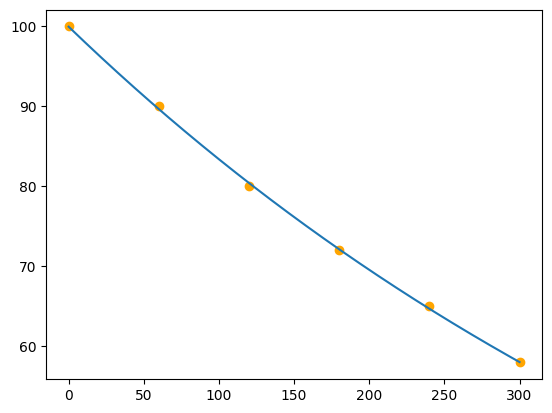

In [71]:
import numpy
import matplotlib.pyplot as plot

def non_linear_graph(x : float, point : Point):
    return point.X * math.exp(point.Y * x)

plot.scatter(list(point.X for point in points2), list(point.Y for point in points2), c="orange")

function1_draw_X = []
function1_draw_y = []
for x in numpy.linspace(0, 300, 1000):
    function1_draw_X.append(x)
    function1_draw_y.append(non_linear_graph(x, calculated_point))

plot.plot(function1_draw_X, function1_draw_y)